In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


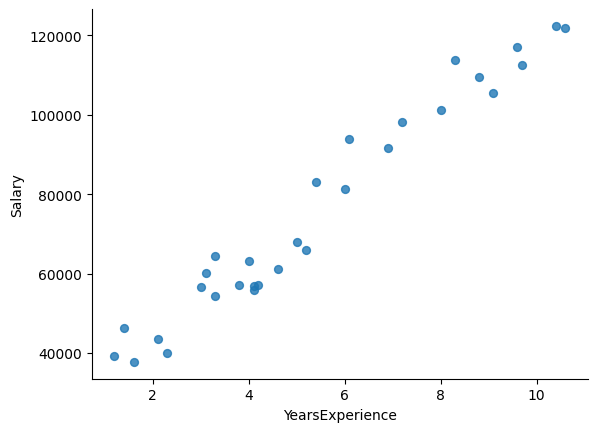

In [13]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

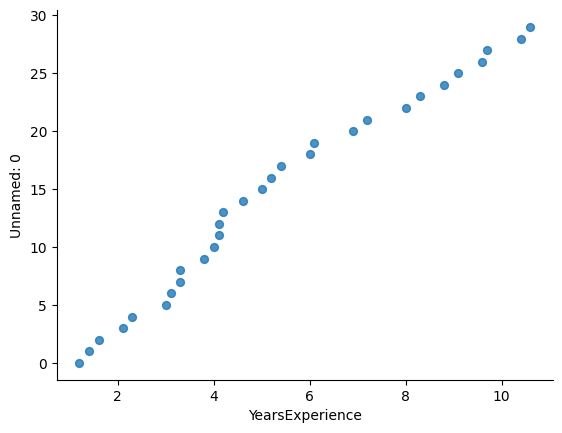

In [10]:
# @title YearsExperience vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsExperience', y='Unnamed: 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:,-1]

In [23]:
X

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [24]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
X_train

array([[ 8.3],
       [ 3.1],
       [ 2.1],
       [ 6.9],
       [ 3. ],
       [ 9.7],
       [ 4.1],
       [ 2.3],
       [ 4. ],
       [ 5.2],
       [10.4],
       [ 9.1],
       [ 5.4],
       [ 1.6],
       [ 3.3],
       [ 9.6],
       [ 8.8],
       [ 6. ],
       [ 4.1],
       [ 8. ],
       [10.6],
       [ 4.2],
       [ 5. ],
       [ 3.3]])

In [28]:
y_train

23    113813.0
6      60151.0
3      43526.0
20     91739.0
5      56643.0
27    112636.0
12     56958.0
4      39892.0
10     63219.0
16     66030.0
28    122392.0
25    105583.0
17     83089.0
2      37732.0
7      54446.0
26    116970.0
24    109432.0
18     81364.0
11     55795.0
22    101303.0
29    121873.0
13     57082.0
15     67939.0
8      64446.0
Name: Salary, dtype: float64

In [30]:
X_test

array([[1.4],
       [1.2],
       [4.6],
       [3.8],
       [7.2],
       [6.1]])

In [31]:
y_test

1     46206.0
0     39344.0
14    61112.0
9     57190.0
21    98274.0
19    93941.0
Name: Salary, dtype: float64

In [32]:
lr.coef_

array([9569.58688543])

In [33]:
lr.intercept_

23437.21046340505

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(X_test,y_test)
mae = mean_absolute_error(X_test,y_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4861880641.879452
66011.77237593864
69727.18725059438


In [36]:
from sklearn.metrics import r2_score
r2_score(X_test,y_test)

-7791952576.700839

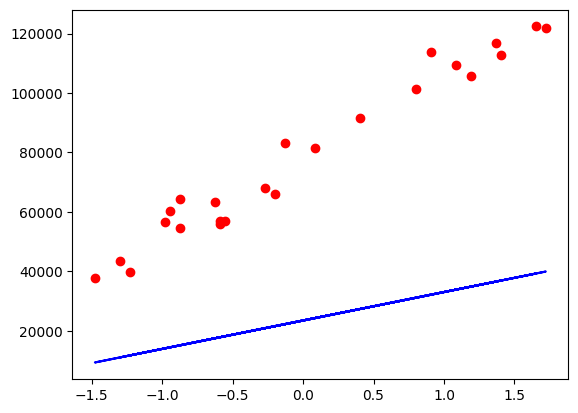

In [37]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train),color='blue')

In [38]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prdictmodel = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.066
Method:                 Least Squares   F-statistic:                              2.694
Date:                Thu, 25 Jul 2024   Prob (F-statistic):                       0.114
Time:                        17:55:38   Log-Likelihood:                         -304.61
No. Observations:                  24   AIC:                                      611.2
Df Residuals:                      23   BIC:                                      612.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.692e+04   1.64e+04      1.641      0.114   -7008.582    6.09e+04
==============================================================================
Omnibus:                        1.448   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.312
Skew:                           0.493   Prob(JB):                        0.519
Kurtosis:                       2.416   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.predict([[2]])

array([53848.18010395])